# Golden Cross Project - Nikhil Golla

In [1]:
# Objectives:
# 1. Analyze Golden Cross Across Multiple Stocks
# 2. Buy when 5 SMA > 200 SMA, sell when otherwise
# 3. Use this as a trading strategy where you invest money and see how the money grows
# 4. Backtest the strategy
# 5. See how the strategy performs on all stocks in VOO
# 6. See how you can use exponential averages or ROC
# 7. Make a trading bot to send you signals when to buy or sell 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

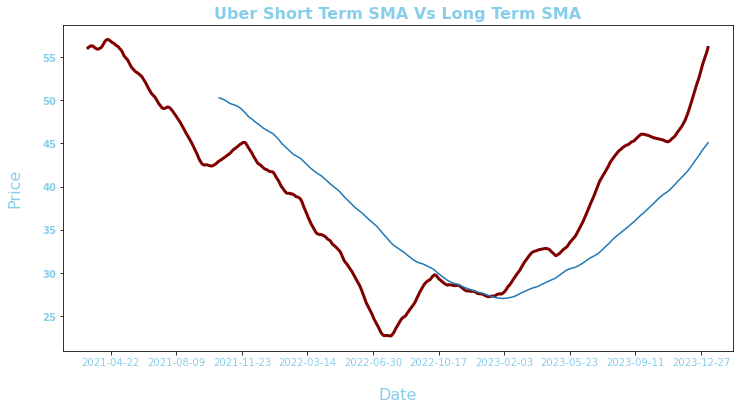

,Date,Open,Close,Volume,50-Day SMA,200-Day SMA
506,2023-01-05,25.730000,25.549999,9942000,27.3082,27.47175
507,2023-01-06,25.860001,26.400000,19443800,27.2690,27.43700
508,2023-01-09,27.299999,27.400000,24962100,27.2530,27.40870
509,2023-01-10,27.400000,28.040001,15413700,27.2574,27.37540
510,2023-01-11,28.240000,28.350000,15421700,27.2744,27.34685
511,2023-01-12,28.850000,29.030001,17513400,27.3236,27.31815
512,2023-01-13,28.680000,29.440001,16940700,27.3174,27.27940
513,2023-01-17,29.440001,29.200001,20816500,27.3252,27.24250
514,2023-01-18,29.950001,28.959999,25257200,27.3298,27.20890
515,2023-01-19,28.469999,29.030001,15651500,27.3426,27.17415


In [3]:
# Stock #1: Uber
# Dataframe Processing
uber = yf.Ticker("UBER")
df = uber.history(start = "2021-01-01", end = "2024-01-10")
df.index = df.index.strftime('%Y-%m-%d')
df["Date"] = df.index
df = df[["Date","Open","Close","Volume"]]
df.index.name = "Index"
df.index = range(1,len(df) + 1)
df['50-Day SMA'] = df['Close'].rolling(window=50).mean()
df['200-Day SMA'] = df['Close'].rolling(window=200).mean()
# Visualization
plt.figure(figsize=(12, 6))
plt.title("Uber Short Term SMA Vs Long Term SMA", color = "skyblue", fontsize = 16, fontweight = 'bold')
sns.lineplot(x='Date', y='50-Day SMA', color = "maroon", linewidth = 3, data=df)
sns.lineplot(x='Date', y='200-Day SMA', data=df)
plt.ylabel('Price', color = "skyblue",fontsize = 16, labelpad=20)
plt.yticks(color = "skyblue",fontweight = 'bold')
plt.xlabel('Date',color = "skyblue",fontsize = 16, labelpad=20)
plt.xticks(df['Date'][::75], color = "skyblue")
plt.margins(x=0.04)
plt.show()
# Golden Cross
df[df['50-Day SMA']>df['200-Day SMA']].head()
df.iloc[505:520]
# The golden cross happens at index 511


In [4]:
# Investment Performance
# There is one golden cross and then short term SMA takes off
# As soon as you see a golden cross, you buy it the next day
# What if you bought $1000 of Uber on 2023-01-13 (Day after Golden Cross Date) and sold it today, what would be the gain?
initialval = 1000
buy = df.iloc[511,1]
sell = df.iloc[len(df) - 1,2]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
buy
# The investment doubles and the profit is $1102.51

Initial Investment: $1000
Final Portfolio Value: $2102.51
Total Profit: $1102.51


28.68000030517578

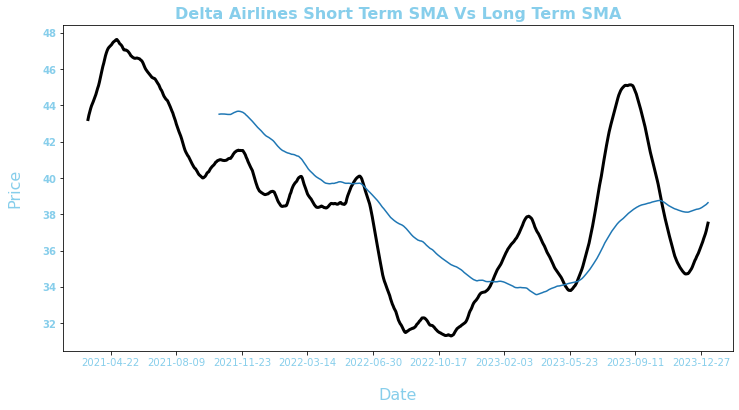

,Date,Open,Close,Volume,50-Day SMA,200-Day SMA
354,2022-05-27,40.799877,42.023872,10730600,39.772515,39.685542
355,2022-05-31,40.511288,41.486504,14691200,39.852323,39.694448
356,2022-06-01,41.924362,39.347004,17573200,39.920987,39.692508
357,2022-06-02,39.207687,39.794807,13761600,39.980893,39.698528
358,2022-06-03,39.008661,38.351883,14804300,40.027066,39.697981
...,...,...,...,...,...,...
701,2023-10-16,34.110001,34.419998,10136900,39.864048,38.740740
702,2023-10-17,34.330002,34.680000,10331900,39.655373,38.751289
703,2023-10-18,34.099998,33.139999,14724500,39.404929,38.753491
704,2023-10-19,33.209999,32.709999,13407100,39.161042,38.754787


In [5]:
# What if we analyzed a more "bouncy" stock with multiple crosses
# Stock #2: Delta Airlines
# Dataframe Processing
delta = yf.Ticker("DAL")
df = delta.history(start = "2021-01-01", end = "2024-01-10")
df.index = df.index.strftime('%Y-%m-%d')
df["Date"] = df.index
df = df[["Date","Open","Close","Volume"]]
df.index.name = "Index"
df.index = range(1,len(df) + 1)
df['50-Day SMA'] = df['Close'].rolling(window=50).mean()
df['200-Day SMA'] = df['Close'].rolling(window=200).mean()
# Visualization
plt.figure(figsize=(12, 6))
plt.title("Delta Airlines Short Term SMA Vs Long Term SMA", color = "skyblue", fontsize = 16, fontweight = 'bold')
sns.lineplot(x='Date', y='50-Day SMA', color = "black", linewidth = 3, data=df)
sns.lineplot(x='Date', y='200-Day SMA', data=df)
plt.ylabel('Price', color = "skyblue",fontsize = 16, labelpad=20)
plt.yticks(color = "skyblue",fontweight = 'bold')
plt.xlabel('Date',color = "skyblue",fontsize = 16, labelpad=20)
plt.xticks(df['Date'][::75], color = "skyblue")
plt.margins(x=0.04)
plt.show()
# Golden Cross
df[df['50-Day SMA']>df['200-Day SMA']]
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# df.iloc[700:715]

# First Cross Date Pair: B - 2022-05-31 (index 355), S - 2022-06-16 (index 367)
# Second Cross Date Pair: B - 2023-01-18 (index 514), S - 2023-05-17 (index 597)
# Third Cross Date Pair: B - 2023-06-07	(index 611), S - 2023-10-24 (index 707)

# Question: Is it better to sell when the short term SMA peaks, is increasing above long term SMA, is declining above the long term SMA, or a reverse cross occurs?
# First we will test buying and selling at the crosses, then we will test declines, then we will test selling at the peak



In [6]:
# Strategy #1: Buying and Selling at Crosses
# First Pair of Crosses: B - 2022-05-31 (index 355), S - 2022-06-16 (index 367) 
initialval = 1000
buy = df.iloc[354,1]
sell = df.iloc[366,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# You lose $246.62

Initial Investment: $1000
Final Portfolio Value: $753.38
Total Profit: $-246.62


In [7]:
# Second Pair of Crosses: B - 2023-01-18 (index 514), S - 2023-05-17 (index 597)
initialval = 1000
buy = df.iloc[513,1]
sell = df.iloc[596,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# You lose $122.09

Initial Investment: $1000
Final Portfolio Value: $877.91
Total Profit: $-122.09


In [8]:
# Third Pair of Crosses: B - 2023-06-07	(index 611), S - 2023-10-24 (index 707)
initialval = 1000
buy = df.iloc[610,1]
sell = df.iloc[706,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# You lose $147.53

Initial Investment: $1000
Final Portfolio Value: $852.47
Total Profit: $-147.53


## Conclusion: Buying at golden cross and selling at the reverse cross will lose money

In [9]:
# Strategy #2: Buy at golden cross and sell when the short-term SMA starts to decline across 3 consecutive days (3 days of black line decline )
# B - 2022-05-31 (index 355), S - 2022-06-13 (index 364) 
initialval = 1000
buy = df.iloc[354,1]
sell = df.iloc[363,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Loss of $164.82


Initial Investment: $1000
Final Portfolio Value: $835.18
Total Profit: $-164.82


In [10]:
# B - 2023-01-18 (index 514), S - 2023-03-22 (index 558)
initialval = 1000
buy = df.iloc[513,1]
sell = df.iloc[557,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Loss of 132.58

Initial Investment: $1000
Final Portfolio Value: $867.42
Total Profit: $-132.58


In [11]:
# B - 2023-06-07 (index 611), S - 2023-09-08 (index 675)
initialval = 1000
buy = df.iloc[610,1]
sell = df.iloc[674,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Profit of $89.76
# Finally in the Green

Initial Investment: $1000
Final Portfolio Value: $1089.76
Total Profit: $89.76


## Conclusion: This strategy is still causing losses, but is a slight improvement

In [12]:
# Scenario #3: Buy at golden cross and sell at the exact peak of short term SMA. This is theoretical since it's hard to know exact peak.
# B - 2022-05-31 (index 355), S - 2022-06-08 (index 361)
initialval = 1000
buy = df.iloc[354,1]
sell = df.iloc[360,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Loss of $45.93

Initial Investment: $1000
Final Portfolio Value: $954.07
Total Profit: $-45.93


In [13]:
# B - 2023-01-18 (index 514), S - 2023-03-17 (index 555)
initialval = 1000
buy = df.iloc[513,1]
sell = df.iloc[554,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Loss of 148.71

Initial Investment: $1000
Final Portfolio Value: $851.29
Total Profit: $-148.71


In [14]:
# B - 2023-06-07 (index 611), S - 2023-09-05 (index 672)
initialval = 1000
buy = df.iloc[610,1]
sell = df.iloc[671,1]
ret = (sell/buy) - 1
finalval = initialval*(1+ret)
profit = finalval-initialval
print("Initial Investment: $" + str(initialval))
print("Final Portfolio Value: $" + str(round(finalval,2)))
print("Total Profit: $" + str(round(profit,2)))
# Profit of $124.98


Initial Investment: $1000
Final Portfolio Value: $1124.98
Total Profit: $124.98


## This strategy yielded the highest profit thus far, but is there a way to figure out a peak?

In [28]:
# Scenario #4: Buy at golden cross and sell after short-term SMA increases for 10 days, close price is steadily increasing, and whatever price is higher between open and close
# Delta Airlines as df
# Golden Cross #1: # First Pair of Crosses: B - 2022-05-31 (index 355), S - 2022-06-16 (index 367) 

# df.iloc[350:370]
# Doesn't make sense to use the strategy here, as the close price is steadily declining in this time frame

# Golden Cross #2: #B - 2023-01-18 open (index 514), S - 2023-02-02 close (index 524)

# initialval = 1000
# buy = df.iloc[513,1]
# sell = df.iloc[523,2]
# ret = (sell/buy) - 1
# finalval = initialval*(1+ret)
# profit = finalval-initialval
# print("Initial Investment: $" + str(initialval))
# print("Final Portfolio Value: $" + str(round(finalval,2)))
# print("Total Profit: $" + str(round(profit,2)))

# $20.99 of profit


# Golden Cross #3: # Third Pair of Crosses: B - 2023-06-07	(index 611), S - 2023-06-22 (index 621)

# initialval = 1000
# buy = df.iloc[610,1]
# sell = df.iloc[620,2]
# ret = (sell/buy) - 1
# finalval = initialval*(1+ret)
# profit = finalval-initialval
# print("Initial Investment: $" + str(initialval))
# print("Final Portfolio Value: $" + str(round(finalval,2)))
# print("Total Profit: $" + str(round(profit,2)))

# $134.78 of profit

# What happens if you decide not to sell at open and the stock falls at the close? Then you should hold and track the trajectory of prices

,Date,Open,Close,Volume,50-Day SMA,200-Day SMA
351,2022-05-24,38.630515,37.038326,10856500,39.519357,39.688676
352,2022-05-25,36.899009,38.411587,10436800,39.593792,39.679422
353,2022-05-26,38.939004,40.630707,15248300,39.671411,39.677083
354,2022-05-27,40.799877,42.023872,10730600,39.772515,39.685542
355,2022-05-31,40.511288,41.486504,14691200,39.852323,39.694448
356,2022-06-01,41.924362,39.347004,17573200,39.920987,39.692508
357,2022-06-02,39.207687,39.794807,13761600,39.980893,39.698528
358,2022-06-03,39.008661,38.351883,14804300,40.027066,39.697981
359,2022-06-06,38.809635,38.809635,12330400,40.061696,39.703305
360,2022-06-07,38.182712,39.546028,9604700,40.098118,39.711365
